<a href="https://colab.research.google.com/github/ayushharry/machinelearning_college/blob/master/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [54]:
batch_size = 32
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28,28 

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [66]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 16)        2064      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 32)              

In [67]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 11s 187us/step - loss: 0.2336 - acc: 0.9272 - val_loss: 0.0645 - val_acc: 0.9795


In [63]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08074223581850529
Test accuracy: 0.9748


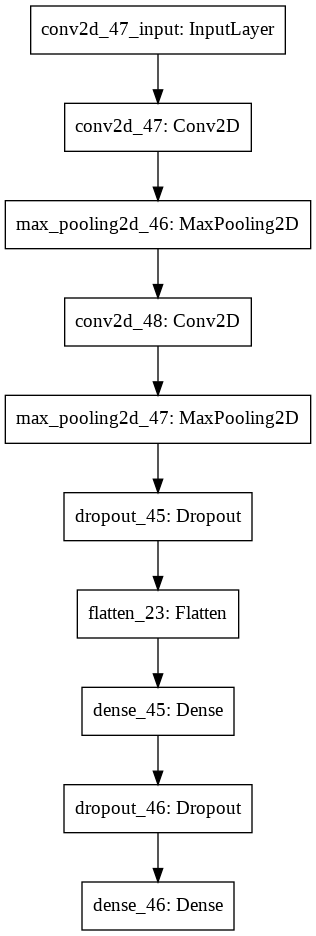

In [64]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')